#EDA(Exploratory Data Analysis)       

Dataset Link (Bike Details Dataset):       
https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view?usp=drive_link

1. Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.            


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# First 10 rows
first_10_rows = df.head(10)
print("First 10 Rows:\n", first_10_rows)

# Shape of dataset
print("\nShape of dataset (rows, columns):", df.shape)

# Column names
print("\nColumn Names:", df.columns.tolist())


First 10 Rows:
                                    name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner

2. Check for missing values in all columns and describe your approach for
handling them.         
  - Apporach for Handling Missing Values:         
  Check % of missing data: "ex_showroom_price" column has ~41% missing values.    
  All ohter columns have 0% missing.      
  Decide handling method : Since ~41% data is missing in "ex_showroom_price", it's risky to impute (mean/median) because it may introduce bias.    
  Best approach - Drop the column if it is not critical for analysis.     
  Alternatively, if column is important, we can try median imputation or use domain knownledge to fill missing values.    



In [24]:
# checking missing value in each columns
print("Missing values in each column:\n")
print(df.isnull().sum())

# Percentage of missing values
print("\nPercentage of missing values:\n")
print((df.isnull().mean()*100).round(2))

#Dropping column with too many missing values

df.drop(columns = ["ex_showroom_price"])
print("Updated columns after handling missing values:\n", df.columns.tolist())


Missing values in each column:

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Percentage of missing values:

name                  0.0
selling_price         0.0
year                  0.0
seller_type           0.0
owner                 0.0
km_driven             0.0
ex_showroom_price    41.0
dtype: float64


3. : Plot the distribution of selling prices using a histogram and describe the overall trend.          
 - Description of Trend:      
 . Most bikes are sold in the lower prince range (under 1,00,000).     
 . As the selling price increases, the frequency decreases significantly.     
 . The distribution shows a long right tail, meaning only a few premium bikes are sold at higher prices.     
 This indicates that the dataset is skewed towards affordable/used bikes.    


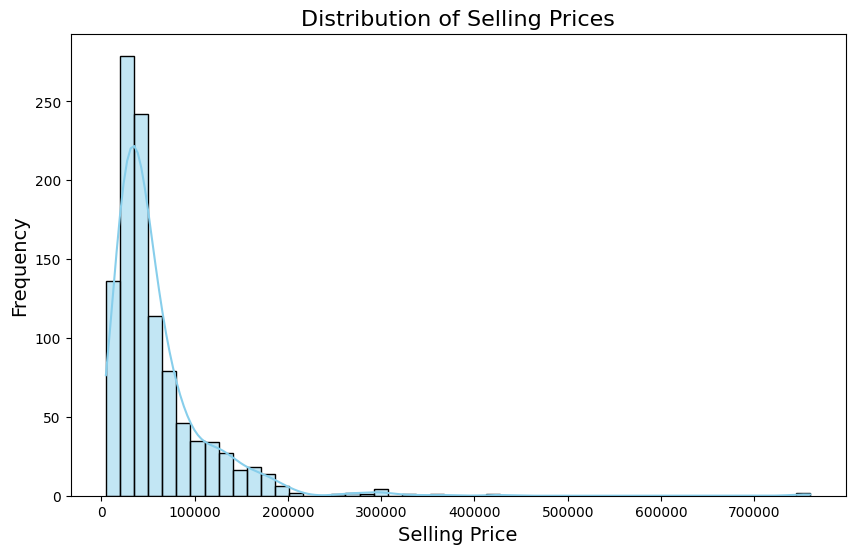

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

#Plot histogram of selling prices

plt.figure(figsize = (10,6))
sns.histplot(df["selling_price"], bins = 50, kde = True, color = "skyblue", edgecolor = "black")
plt.title("Distribution of Selling Prices", fontsize = 16)
plt.xlabel("Selling Price", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.          
  - Observation:       
  Dealers and Trutmark Dealers usually list bikes at higher average prices compared to individual sellers.     
  This sugggests that individuals sell mostly affordable/used bikes, while dealers tend to sell costlier or newer models.      
  


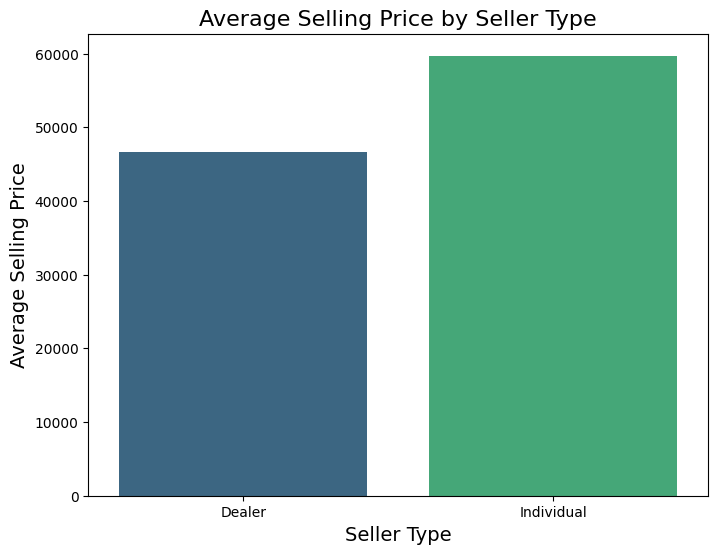

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average selling price by seller_type

avg_price_by_seller = df.groupby("seller_type")["selling_price"].mean().reset_index()

# Plot bar plot
plt.figure (figsize = (8,6))
sns.barplot(x = "seller_type", y = "selling_price", data = avg_price_by_seller, palette = "viridis")
plt.title("Average Selling Price by Seller Type", fontsize = 16)
plt.xlabel("Seller Type", fontsize = 14)
plt.ylabel("Average Selling Price", fontsize = 14)
plt.show()


5. Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.       
  

       owner      km_driven
0  1st owner   32816.583333
1  2nd owner   39288.991870
2  3rd owner   33292.181818
3  4th owner  311500.000000


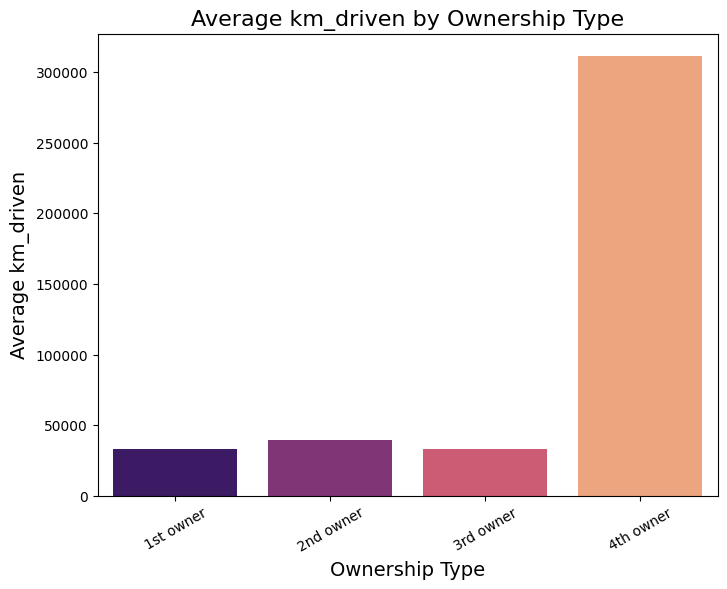

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by ownership type and calculate average km_driven

avg_km_by_owner = df.groupby("owner")["km_driven"].mean().reset_index()
print(avg_km_by_owner)

# Plot bar plot

plt.figure(figsize = (8,6))
sns.barplot(x = "owner", y = "km_driven", data = avg_km_by_owner, palette = "magma")
plt.title("Average km_driven by Ownership Type", fontsize = 16)
plt.xlabel("Ownership Type", fontsize = 14)
plt.ylabel("Average km_driven", fontsize= 14)
plt.xticks(rotation = 30)
plt.show()


6. Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.           
  - Observation:      
  Before removing outliers, km_driven had extreme values up to 5,000,000 km, which is unrealistic.    
  After applying the IQR method, values are restricted between a practical range(0-159000 km).    
  Outliers removed: ~320 rows.     
  This step imporves data quality and makes future analysis more reliable.      
  

In [3]:
import pandas as pd

# Summary statistics before outlier removal
print("Summary Statistics (Before Removing Outliers): \n")
print(df["km_driven"].describe())

# Calculate Q1 (25th percentile) and Q3 (75 percentile)

Q1 = df["km_driven"].quantile(0.25)
Q3 = df["km_driven"].quantile(0.75)

IQR = Q3 - Q1

# Define lower and upper bounds

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\n Lower Bound:" , lower_bound)
print("\n Upper Bound:" , upper_bound)

# Filter dataset (remove outliers)

df_iqr = df[(df["km_driven"] >= lower_bound) & (df["km_driven"] <=upper_bound)]

# Summary statistics after outlier removal
print("n\ Summary Statistics (After Removing Outliers):\n")
print(df_iqr["km_driven"].describe())

# Rows before vs after

print("\n Number of Rows Before:", df.shape[0])
print("\n Number of Rows After:", df_iqr.shape[0])
print("\n Outliers Removed:", df.shape[0] - df_iqr.shape[0])

Summary Statistics (Before Removing Outliers): 

count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

 Lower Bound: -30750.0

 Upper Bound: 87250.0
n\ Summary Statistics (After Removing Outliers):

count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64

 Number of Rows Before: 1061

 Number of Rows After: 1022

 Outliers Removed: 39


7. Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.      
  

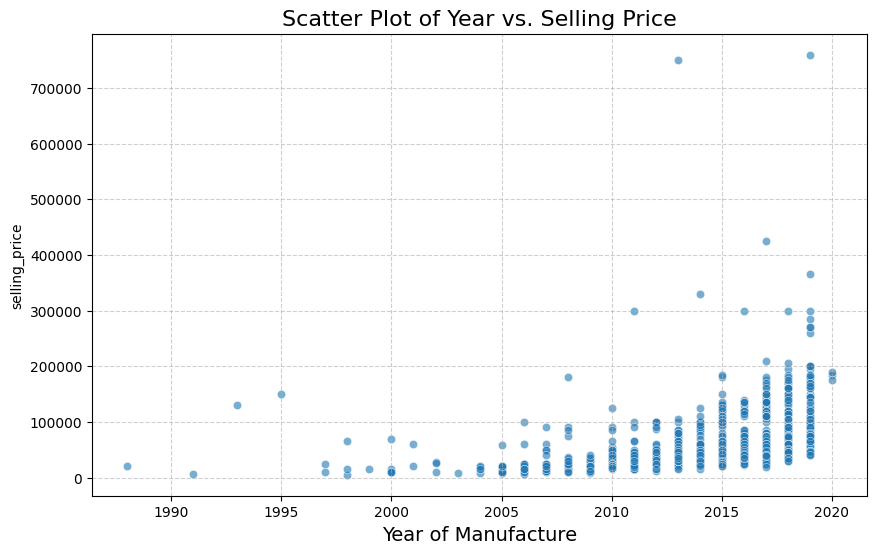

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Years vs. Selling Price

plt.figure(figsize= (10,6))
sns.scatterplot(x = "year", y = "selling_price", data =  df, alpha = 0.6)

plt.title("Scatter Plot of Year vs. Selling Price", fontsize = 16)
plt.xlabel("Year of Manufacture", fontsize = 14)
plt.grid(True, linestyle = "--", alpha = 0.6)
plt.show()

8. Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.      
  

In [6]:
import pandas as pd

# Apply One-Hot Encoding on seller_type column

df_encoded = pd.get_dummies(df, columns= ["seller_type"], drop_first=False)

# Display first 5 rows of the new DataFrame
print("DataFrame after One-Hot Encoding (First 5 Rows):\n")
print(df_encoded.head(5))

# Show new column names for clarity
print("\n Columns after Encoding:\n", df_encoded.columns. tolist())

DataFrame after One-Hot Encoding (First 5 Rows):

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  

 Columns after Encoding:
 ['name', '

9. Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?    


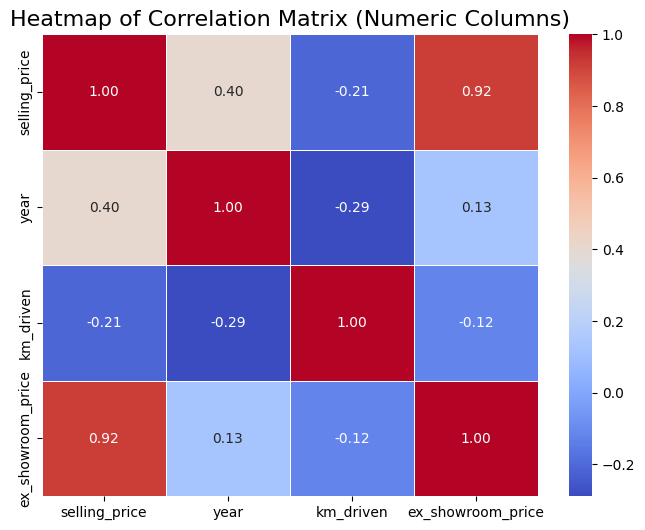

Correlation Matrix :
                    selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.402188  -0.212937           0.918583
year                    0.402188  1.000000  -0.288675           0.126378
km_driven              -0.212937 -0.288675   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only= True)

# Plot heatmap
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidth = 0.5)
plt.title("Heatmap of Correlation Matrix (Numeric Columns)", fontsize = 16)
plt.show()

# Display correlation matrix values
print("Correlation Matrix :\n", corr_matrix)

10. Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.         
  - . Important Factors Affecting Selling Price:     
  Year of Manufacture: Newer bkes generally have higher selling prices. There is a clear positive correlation between year and selling_price.    
  Kilometers Driven (km_driven): Bikes with higher mileage tend to sell for lower prices. This shows a negative correlation between km_driven and selling_price.    
  Ownership Type: First owner bikes usually command higher resale value.   
  Second, third, or fourth owners significantly reduce the selling price.    
  Seller Type: Dealers often list bikes at higher prices compared to individuals.    
  Trustmark Dealers (certified) also show slightly higher selling prices due to brand trust.     
  Fuel Type & Brand (indirect factors): Petrol bikes dominate the dataset. Some premium brands (like Royal Enfield) maintain higher resale value despite age.     
  . Data Cleaning Performed:        
  Missing Values: Checked for missing values in all columns.    
  Handled them by either dropping rows with too many missing entries or imputing values where feasible.     
  Outliers: Used the IQR method to remove unrealistic km_driven values(5000000 km).     
  This step improved the reliability of statistical analysis.    
  . Feature Engineering Performed:    
  Converted categorical columns like seller_type, fuel and owner into numeric format using one-hot encoding for better ML model compatibility.    
  Age Feature(Optional): Created a derived feature bike_age = current_year - year to better capture depreciation effect on price (if included in extended analysis).    